# Visualisation

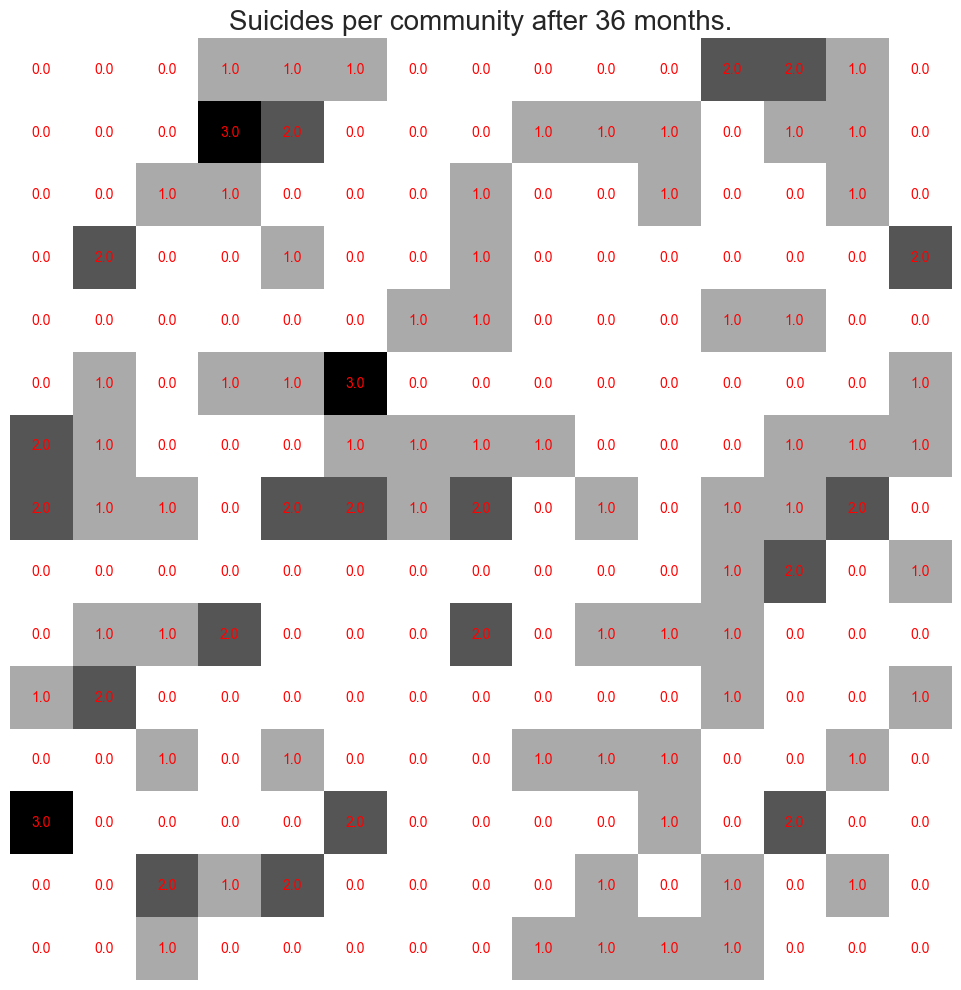

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(world_final, cmap= 'binary')

# create text annotations.
for (i, j), value in np.ndenumerate(world_final):
    ax.text(j, i, str(value), ha="center", va="center", color="r")

ax.set_title(f"Suicides per community after {T} months.", fontdict={'fontsize': 20})
ax.axis('off')
# Add a colorbar (legend)
# cbar = fig.colorbar(im, ax=ax)
fig.tight_layout()
plt.show()

In [ ]:
# Row is a number of suicides for all communities for next iterations
world_suiciders = [np.sum(row,axis=0) if row else np.zeros(7) for row in results2]
world_suiciders = np.vstack(world_suiciders)

In [ ]:
suicides_sums = np.sum(world_suiciders, axis=0)
suicides_sums

array([50.0, 9.0, 2.0, 5.0, 2.0, 26.0, 0.0], dtype=object)

# Our percentage among suicides vs data

In [ ]:
suicides_percentage_data = [0.8414182057, 0.1717329604, 0.01286335191, 0.2031140343, 0.06308793583]

#'Men', 'Alcohol addict', 'Drugs addict', 'Psychiatric treatment', 'Chronic disease'
suicides_percentage = suicides_sums[:5] / suiciders_total
suicides_percentage

columns = ['Men', 'Alcohol addict', 'Drugs addict', 'Psychiatric treatment', 'Chronic disease']
df_percentage = pd.DataFrame([suicides_percentage, suicides_percentage_data], columns=columns)
df_percentage.index = ["Our model", "Government data"]
df_percentage = df_percentage.T
df_percentage

,Our model,Government data
Men,0.450450,0.841418
Alcohol addict,0.081081,0.171733
Drugs addict,0.018018,0.012863
Psychiatric treatment,0.045045,0.203114
Chronic disease,0.018018,0.063088


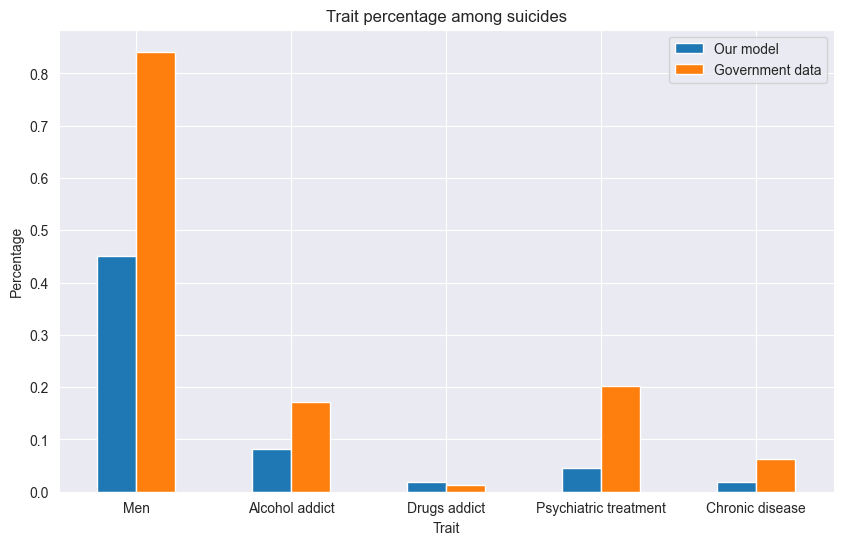

In [ ]:
# Plot
df_percentage.plot(kind='bar', figsize=(10, 6))
plt.title('Trait percentage among suicides')
plt.xlabel('Trait')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

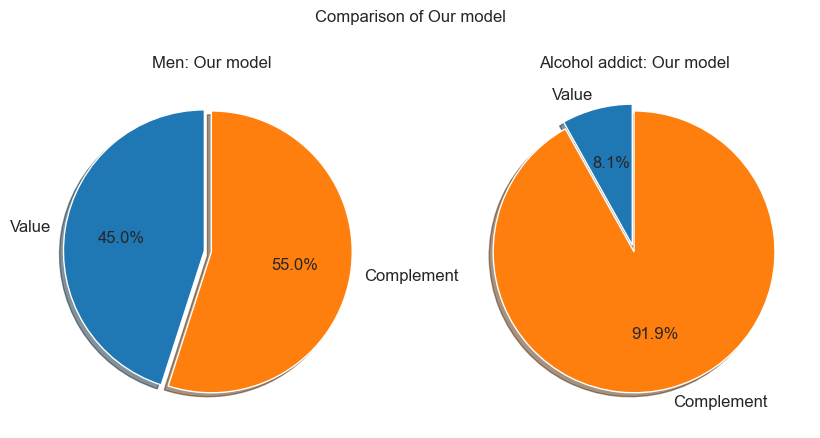

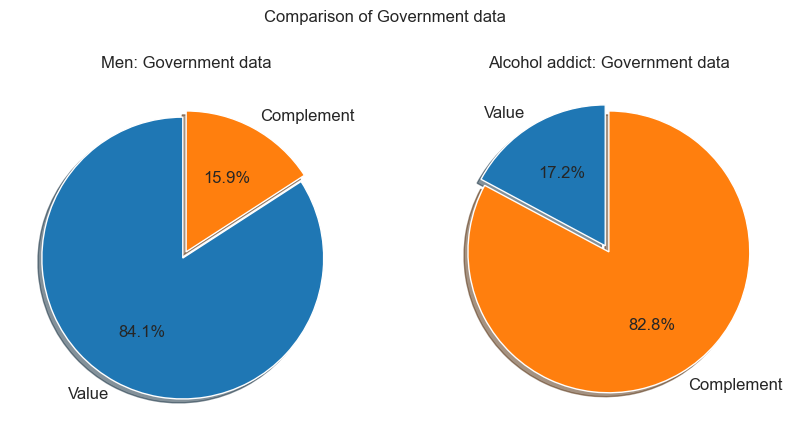

In [ ]:
def create_explode(data):
    return [0.05, 0]  # Explode only the first part of the pie chart

def create_pie_charts(df):
    for col in df.columns:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        # Values for the pie charts
        values1 = [df[col].iloc[0], 1 - df[col].iloc[0]]
        values2 = [df[col].iloc[1], 1 - df[col].iloc[1]]

        # Plot the first pie chart
        axs[0].pie(values1, labels=['Value', 'Complement'], autopct="%1.1f%%", startangle=90, explode=create_explode(values1), shadow=True, textprops={'fontsize': 12})
        axs[0].set_title(f'{df.index[0]}: {col}')

        # Plot the second pie chart
        axs[1].pie(values2, labels=['Value', 'Complement'], autopct="%1.1f%%", startangle=90, explode=create_explode(values2), shadow=True, textprops={'fontsize': 12})
        axs[1].set_title(f'{df.index[1]}: {col}')

        # Display the charts
        plt.suptitle(f'Comparison of {col}')
        plt.show()

create_pie_charts(df_percentage)


# Growth over time

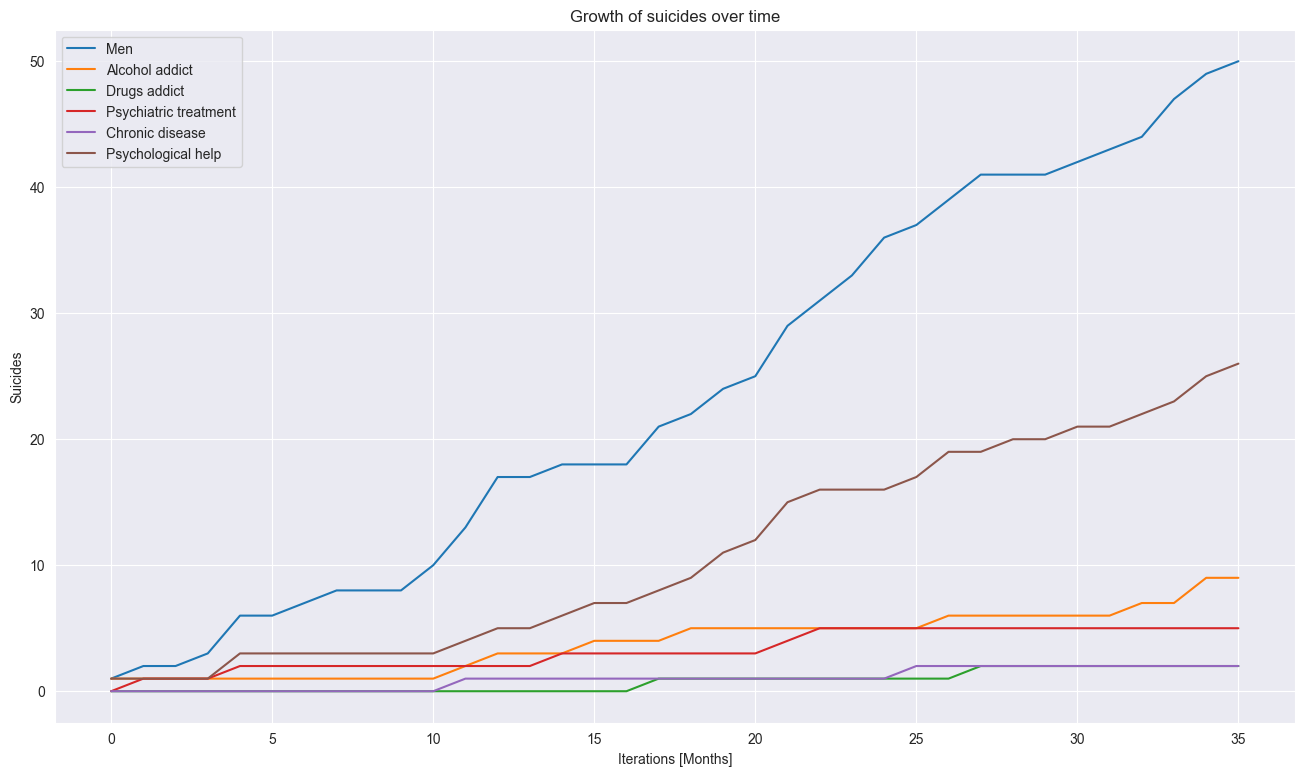

In [ ]:
# row is a number of suicides from start to t
# without celebirty
suicides_cumsum = np.cumsum(world_suiciders, axis=0)

# Plot each column as a separate line
plt.figure(figsize=(16, 9))
column_labels = ['Men', 'Alcohol addict', 'Drugs addict', 'Psychiatric treatment', 'Chronic disease', 'Psychological help']

for col in range(suicides_cumsum.shape[1]-1):
    plt.plot(suicides_cumsum[:, col], label=column_labels[col])

# Labels and legend
plt.xlabel("Iterations [Months]")
plt.ylabel("Suicides")
plt.title("Growth of suicides over time")
plt.legend()

# Show the plot
plt.show()